# Density and potentials of an axisymmetric disk

Figure 6.1 from Chapter 6 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Isodensity and Equipotential contours for an axisymmetric disk described by density
\begin{equation}
  \rho(R,z) = \frac{v_0^2}{4\pi Gq^2}\left[\frac{R^2 + z^2(1-1/q^2)}{\left(R^2 + z^2/q^2\right)}\right]
\end{equation}
and potential
\begin{equation}
  \Phi(R,z) = \frac{1}{2}v_0^2\ln\left(R^2 + z^2/q^2\right)
\end{equation}
We will compute the density and potential for oblate potential axis ratio $q=0.8$ normalized to units of
$v_0=1$ and $G=1$.

This potential will appear again in Chapter 7, Figures 7.2 and 7.3

In [5]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [6]:
plotFile = 'Fig6_1.png' 

# graphic aspect ratio = width/height

aspect = 2.2

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Axisymmetric disk density and potential

Isodensity and Equipotential contours for an axisymmetric disk described by density
\begin{equation}
  \rho(R,z) = \frac{v_0^2}{4\pi Gq^2}\left[\frac{R^2 + z^2(1-1/q^2)}{\left(R^2 + z^2/q^2\right)}\right]
\end{equation}
and potential
\begin{equation}
  \Phi(R,z) = \frac{1}{2}v_0^2\ln\left(R^2 + z^2/q^2\right)
\end{equation}

Setup functions to plot these in units where $v_0=1$ and $G=1$ for numerical convenience.  Leave $q$
as a free parameter

In [7]:
def rhoAxi(R,z,q):
    q2 = q*q
    const = 1.0/(4*np.pi*q2)
    rho = const*(R*R + z*z*(2-(1/q2)))/((R*R + z*z/q2)**2)
    return rho

def phiAxi(R,z,q):
    q2 = q*q
    phi = 0.5*np.log(R*R + z*z/q2)
    return phi

## Compute density and potential

Compute $\rho$ and $\Phi$ for (R,z) = [0..10] for oblate potential axis ratio $q=0.8$. 

Plot $\rho$ in logarithmic contours spaced by $\Delta\log_{10}\rho=0.25$ and $\Phi$ with
contours spaced by $\Delta\Phi=0.25$

If you change any of the parameters of the computation, uncomment the print statements to
get guidance on how to set the contour levels and spacing.

In [8]:
# plotting limits

rMin = 0.01 # both rho and Phi infinite at R=0
rMax = 10.0
zMin = 0.00
zMax = 10.0

# axis ratio of the oblate potential

q = 0.8

# setup the grid in R,z coordinates

numPix = 501
Rg = np.linspace(rMin,rMax,numPix)
zg = np.linspace(zMin,zMax,numPix)
R,z = np.meshgrid(Rg,zg)

# density

rho = rhoAxi(R,z,q)
#print(f'rho: min={np.min(rho)} max={np.max(rho)}')
#print(f'log10(rho): min={np.log10(np.min(rho))} max={np.log10(np.max(rho))}')

# log isodensity contours

logRhoMin = -3.5
logRhoMax = 2.0
dlogRho = 0.25
logRho = np.arange(logRhoMin,logRhoMax+dlogRho,dlogRho)
rhoLevels = 10**logRho

# potential

phi = phiAxi(R,z,q)
#print(f'\nphi: min={np.min(phi)} max={np.max(phi)}')

# equipotential contours

phiMin = -4.0
phiMax = 2.5
dphi = 0.25
phiLevels = np.arange(phiMin,phiMax+dphi,dphi)

## Figure 6.1: side by side format

Left Panel: isodensity contours in steps of $\Delta\log_{10}\rho=0.25$

Right Panel: equipotential contours in steps of $\Delta\Phi=0.25$

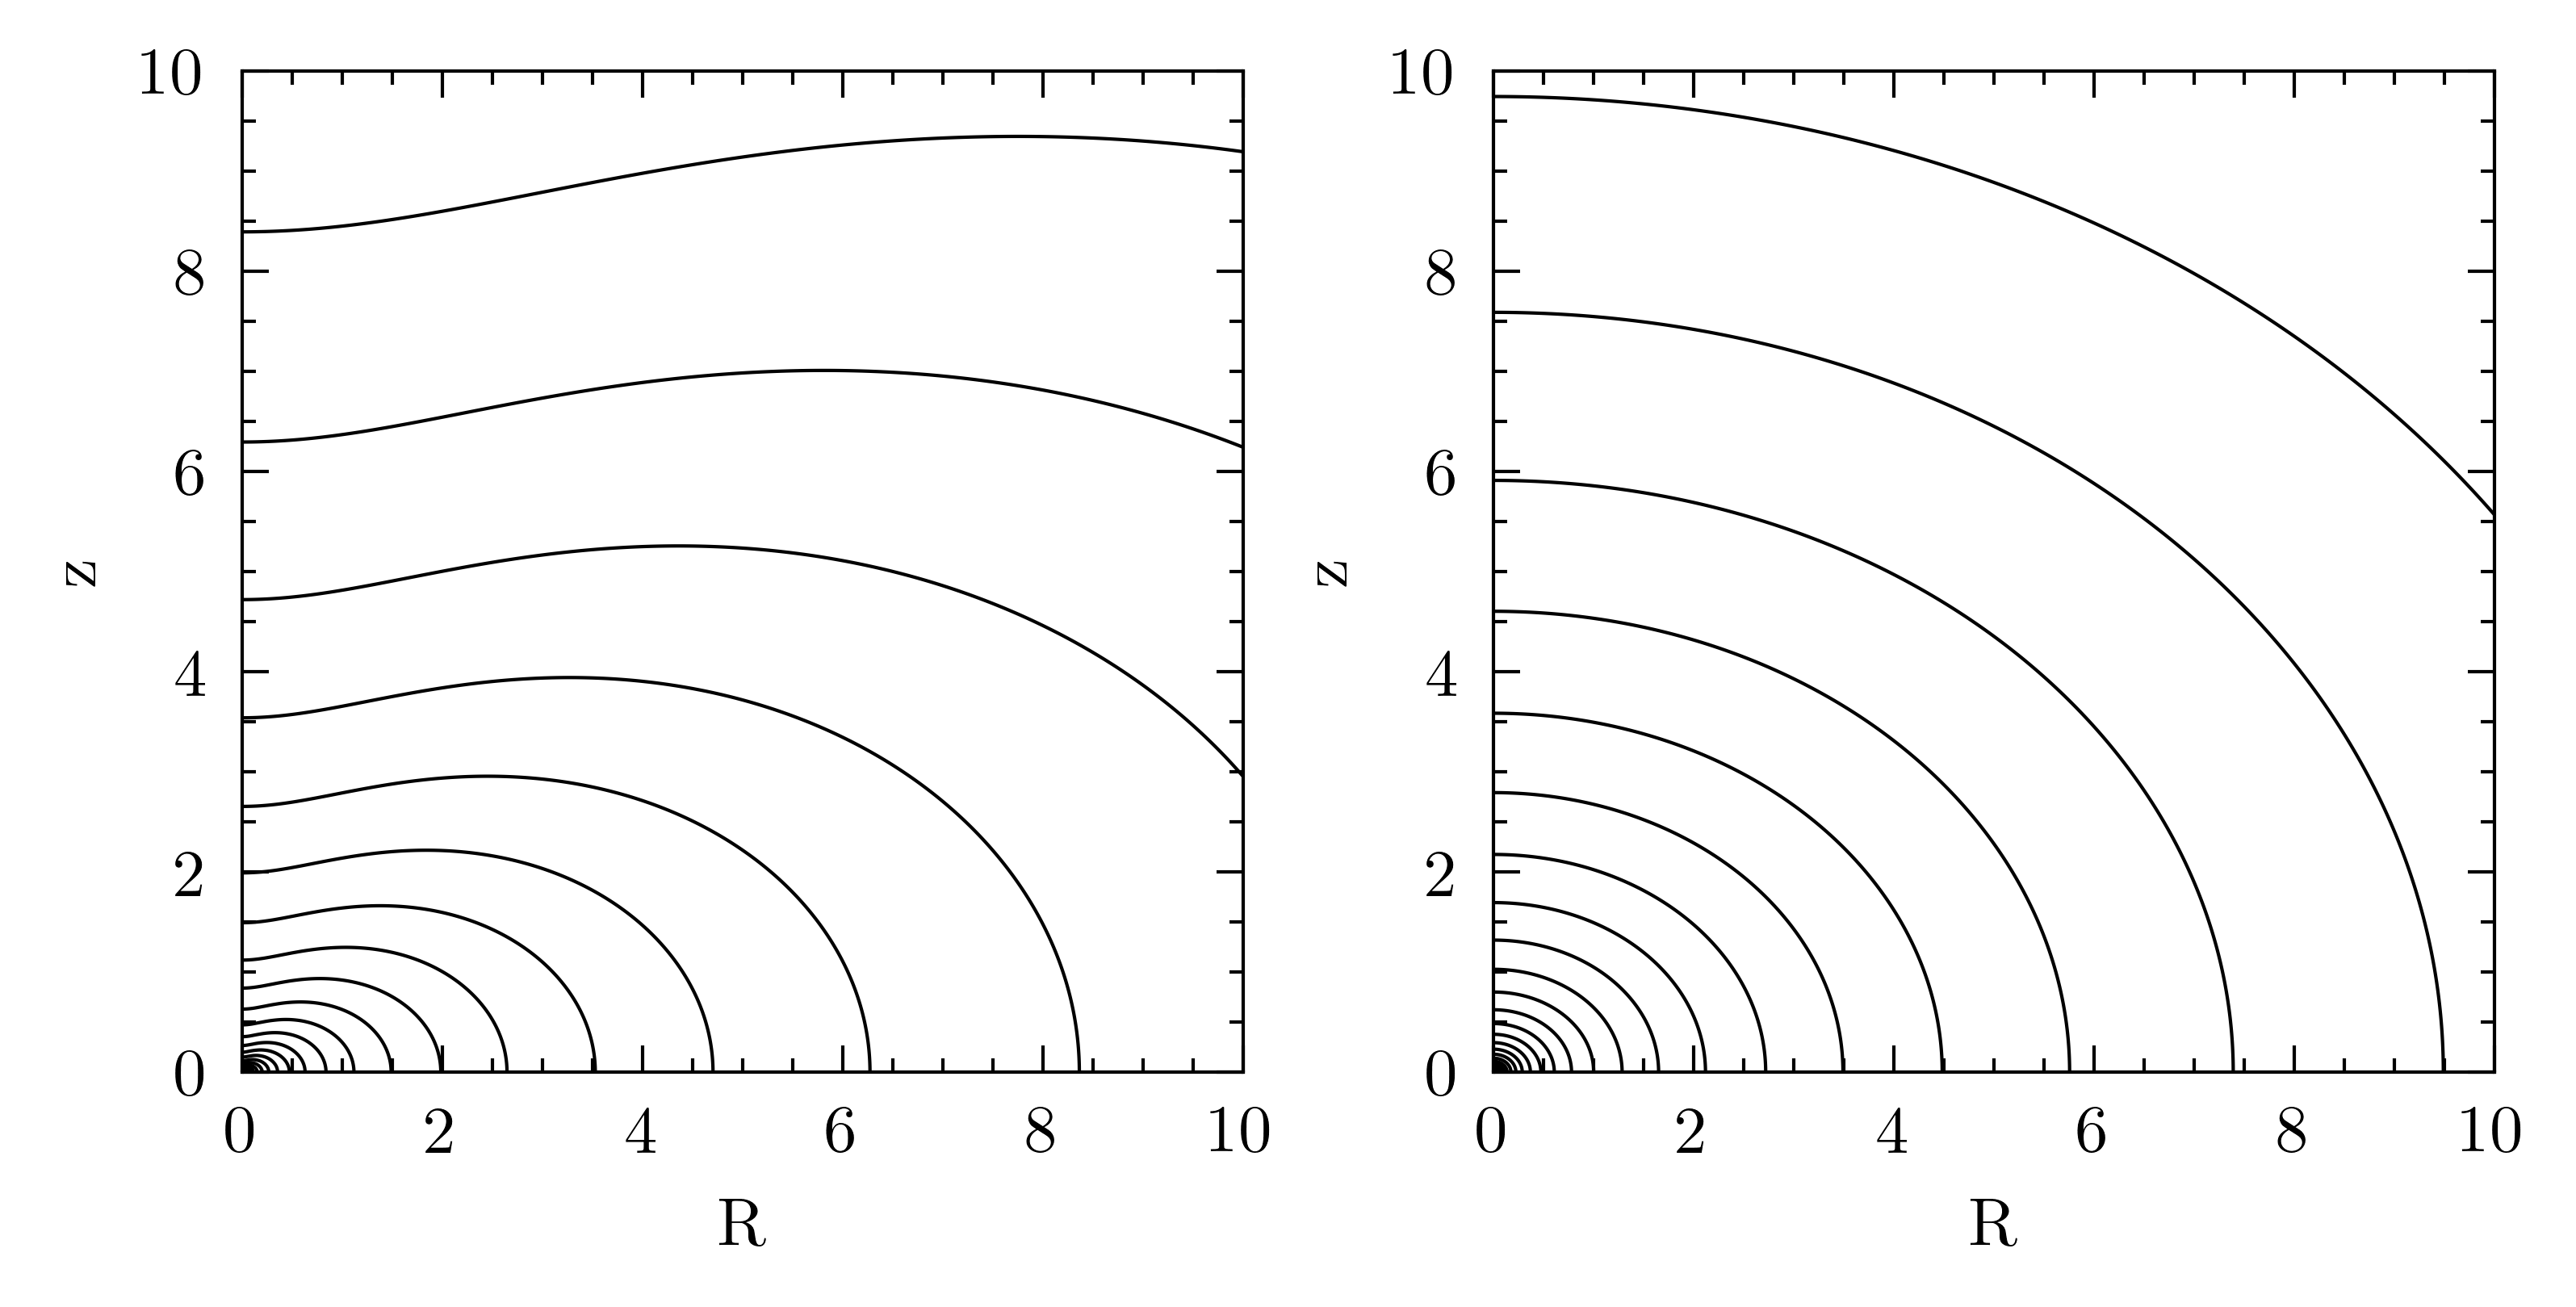

In [9]:
# plotting limits

rMin = 0.0
rMax = 10.0
zMin = 0.0
zMax = 10.0

# Start the plot

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
fig.subplots_adjust(wspace=0.25, hspace=0.0)

# left panal: isodensity contours

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax1.set_aspect('equal')

ax1.set_xlim(rMin,rMax)
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_xlabel(r'R',fontsize=axisFontSize)

ax1.set_ylim(zMin,zMax)
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_ylabel(r'z',fontsize=axisFontSize)

cs = ax1.contour(R,z,rho,levels=rhoLevels,colors=['black'],linestyles='solid',linewidths=0.5)

# right panel: circular speed profiles

# left panal: isodensity contours

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')

ax2.set_aspect('equal')

ax2.set_xlim(rMin,rMax)
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
ax2.set_xlabel(r'R',fontsize=axisFontSize)

ax2.set_ylim(zMin,zMax)
ax2.yaxis.set_major_locator(MultipleLocator(2))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))
ax2.set_ylabel(r'z',fontsize=axisFontSize)

cs = ax2.contour(R,z,phi,levels=phiLevels,colors=['black'],linestyles='solid',linewidths=0.5)
    
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')